
# Logistic Regression with Gradient Descent

This notebook demonstrates how logistic regression works using gradient descent, implemented from scratch in Python.

We'll use synthetic data for binary classification and visualize the decision boundary and loss function as the model learns.


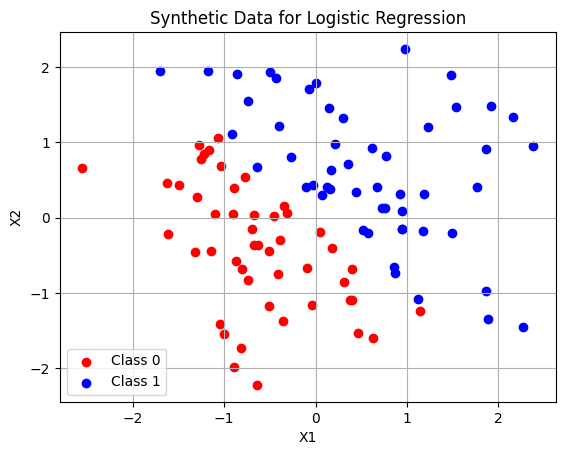

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
num_points = 100
X = np.random.randn(num_points, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Plot data
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


## Logistic Regression Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))


## Model Training with Gradient Descent

In [ ]:
# Add bias term to input
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights
weights = np.zeros(X_bias.shape[1])

# Hyperparameters
learning_rate = 0.1
epochs = 1000
losses = []

# Gradient Descent
for epoch in range(epochs):
    z = np.dot(X_bias, weights)
    y_hat = sigmoid(z)
    loss = compute_loss(y, y_hat)
    losses.append(loss)

    gradient = np.dot(X_bias.T, (y_hat - y)) / len(y)
    weights -= learning_rate * gradient

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


## Plotting Loss Curve

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Time")
plt.grid(True)
plt.show()


## Visualizing Decision Boundary

In [ ]:
x1 = np.linspace(-3, 3, 100)
x2 = -(weights[0] + weights[1] * x1) / weights[2]

plt.plot(x1, x2, label="Decision Boundary", color='green')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


## Try it Yourself: Make Predictions

In [ ]:
def predict(X_input):
    X_input_bias = np.c_[np.ones((X_input.shape[0], 1)), X_input]
    return (sigmoid(np.dot(X_input_bias, weights)) >= 0.5).astype(int)

# Example: Predict a few points
test_points = np.array([[1, 2], [-1, -2], [0, 0]])
predictions = predict(test_points)

for i, point in enumerate(test_points):
    print(f"Point {point} => Predicted Class: {predictions[i]}")
